<a href="https://colab.research.google.com/github/FLjv77/Quantum_ML_Course/blob/main/codes/multi_qubits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installations

In [1]:
pip install pennylane --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 53.3 MB/s eta 0:00:00


###Imports

In [2]:
import pennylane as qml
import numpy as np
import matplotlib as plt

###Utilities

In [11]:
def prepare_states(phi, theta, omega):
    qml.Rot(phi, theta, omega, wires=0)
    qml.Hadamard(wires=1)

###Controlled Rotations

[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]
(<Figure size 700x400 with 1 Axes>, <Axes: >)


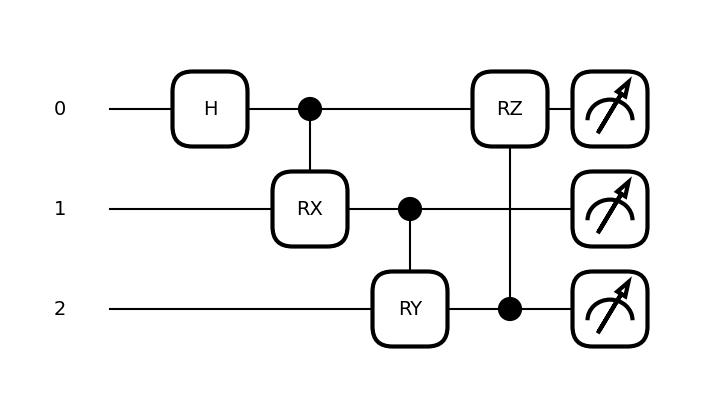

In [6]:
dev = qml.device("default.qubit", wires=3)


@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    qml.H(wires = 0)
    qml.CRX(theta, wires = [0, 1])
    qml.CRY(phi, wires = [1, 2])
    qml.CRZ(omega, wires = [2, 0])

    return qml.probs(wires = [0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
circuit = controlled_rotations(theta, phi, omega)
print(circuit)
print(qml.draw_mpl(controlled_rotations)(theta, phi, omega))

###Swap

In [9]:
dev = qml.device("default.qubit", wires=2)
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    qml.SWAP(wires = [0, 1])
    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)
    qml.CNOT(wires = [0, 1])
    qml.CNOT(wires = [1, 0])
    qml.CNOT(wires = [0, 1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


Regular SWAP state = [-0.19244999-0.21539265j  0.29276072+0.57520446j -0.19244999-0.21539265j
  0.29276072+0.57520446j]
CNOT SWAP state = [-0.19244999-0.21539265j  0.29276072+0.57520446j -0.19244999-0.21539265j
  0.29276072+0.57520446j]


###Toffoli

In [22]:
dev = qml.device("default.qubit", wires=3)

def no_swap(phi, theta):
    qml.X(wires = 0)
    qml.RY(phi, wires = 1)
    qml.RY(theta, wires = 2)

@qml.qnode(dev)
def controlled_swap(phi, theta):
    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    no_swap(phi, theta)
    qml.Toffoli(wires = [0, 1, 2])
    qml.Toffoli(wires = [0, 2, 1])
    qml.Toffoli(wires = [0, 1, 2])

    return qml.state()


# print(no_swap(phi, theta))
print(controlled_swap(phi, theta))


[0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.33713923+0.j 0.23064936+0.j 0.75333659+0.j 0.51538529+0.j]
